# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# citipy.nearest_city(44.967057, -92.994648).city_name
# citipy.nearest_city(44.967057, 0).city_name

In [2]:
# Import API key
#from api_keys import api_key
from OpenWeatherMap import api_key

# Base URL for Weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Open Weather Map restrict API call for free user
# Free user can make 60 requests per min (58 for safe run)
free_per_min = 58

# Configuration
degree=u'\N{DEGREE SIGN}'
units_dict = {
            "standard": {"units":"standard", "Temp Scale":"K", "Speed Scale" : "meter/sec"},
            "metric": {"units":"metric", "Temp Scale":degree+"C", "Speed Scale" : "meter/sec"},
            "imperial": {"units":"imperial", "Temp Scale":degree+"F", "Speed Scale" : "miles/hour"}
            }

units=units_dict["imperial"]["units"]
Temp_scale=units_dict[units]["Temp Scale"]
Speed_scale=units_dict[units]["Speed Scale"]

# build partial url
citi_url = f"{base_url}appid={api_key}&units={units}&q="

In [3]:
# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create Cities Dataframe to store the data
cities_df = pd.DataFrame({"City": cities})
cities_df["City"]

0          leresti
1          rikitea
2          vaitupu
3             luba
4        sheffield
          ...     
611           auki
612      rio tinto
613     springdale
614        mareeba
615    alekseyevka
Name: City, Length: 616, dtype: object

In [6]:
# Add columns to store Weather data
cities_df["Country"] = ""
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df["Date"] = ""
cities_df["Max Temp"] = np.nan
cities_df["Humidity"] = np.nan
cities_df["Cloudiness"] = np.nan
cities_df["Wind Speed"] = np.nan
cities_df

,City,Country,Lat,Lon,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,leresti,,,,,NaN,NaN,NaN,NaN
1,rikitea,,,,,NaN,NaN,NaN,NaN
2,vaitupu,,,,,NaN,NaN,NaN,NaN
3,luba,,,,,NaN,NaN,NaN,NaN
4,sheffield,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
611,auki,,,,,NaN,NaN,NaN,NaN
612,rio tinto,,,,,NaN,NaN,NaN,NaN
613,springdale,,,,,NaN,NaN,NaN,NaN
614,mareeba,,,,,NaN,NaN,NaN,NaN


In [7]:
# iterate through each site in the Cities list
print(f"Beginning Weather data Retrieval, Current Time: {time.ctime(datetime.datetime.now().timestamp())}")
print("-----------------------------")

# Date when the data is pulled, from the API
today_date = datetime.date.strftime(datetime.date.today(), '%m/%d/%Y')

# Loop through each city, and make the api call, assign the result to dataframe
for index, row in cities_df.iterrows():
    city = row["City"]
    
    
    #Make the weather api call for the city
    weather_json = requests.get(citi_url + city).json()
    
    try:
        print(f"Processing record:{index+1}, City: {city}")
        #assign the json result to respective column.
        cities_df.at[index, "Country"] = weather_json["sys"]["country"]
        cities_df.at[index, "Lat"] = weather_json["coord"]["lat"]
        cities_df.at[index, "Lon"] = weather_json["coord"]["lon"]
        cities_df.at[index, "Date"] = weather_json["dt"]
        cities_df.at[index, "Max Temp"] = weather_json["main"]["temp_max"]
        cities_df.at[index, "Humidity"] = weather_json["main"]["humidity"]
        cities_df.at[index, "Cloudiness"] = weather_json["clouds"]["all"]
        cities_df.at[index, "Wind Speed"] = weather_json["wind"]["speed"]
    except (KeyError, IndexError):
        print(f'City "{city}" not found. Skipping...')
        
    # take program to 1 min sleep, for every free request count
    # Pausing the call for 60 seconds, since it was observed that 58 calls are made within 30 seconds
    if (index+1) % free_per_min == 0:
        print(f"Paused for 1 min, current time: {time.ctime(datetime.datetime.now().timestamp())}")
        time.sleep(40)  
print("-----------------------------")  
print("Data retrival completed") 
# print(json.dumps(weather_json, indent=4, sort_keys=True))

Beginning Weather data Retrieval, Current Time: Tue Oct 15 00:09:54 2019
-----------------------------
Processing record:1, City: leresti
Processing record:2, City: rikitea
Processing record:3, City: vaitupu
City "vaitupu" not found. Skipping...
Processing record:4, City: luba
Processing record:5, City: sheffield
Processing record:6, City: teguldet
Processing record:7, City: el colomo
Processing record:8, City: ribeira grande
Processing record:9, City: kruisfontein
Processing record:10, City: yellowknife
Processing record:11, City: mandalgovi
Processing record:12, City: busselton
Processing record:13, City: punta arenas
Processing record:14, City: nemuro
Processing record:15, City: bredasdorp
Processing record:16, City: sao francisco de assis
City "sao francisco de assis" not found. Skipping...
Processing record:17, City: samusu
City "samusu" not found. Skipping...
Processing record:18, City: belushya guba
City "belushya guba" not found. Skipping...
Processing record:19, City: saskylak

Processing record:179, City: rio gallegos
Processing record:180, City: henties bay
Processing record:181, City: mataura
Processing record:182, City: rawson
Processing record:183, City: sao felix do xingu
Processing record:184, City: tessalit
Processing record:185, City: thunder bay
Processing record:186, City: lompoc
Processing record:187, City: osakarovka
Processing record:188, City: saint-augustin
Processing record:189, City: codrington
Processing record:190, City: kailua
Processing record:191, City: iqaluit
Processing record:192, City: huilong
Processing record:193, City: altrincham
Processing record:194, City: mollendo
Processing record:195, City: rocha
Processing record:196, City: mocambique
City "mocambique" not found. Skipping...
Processing record:197, City: fairbanks
Processing record:198, City: dolbeau
City "dolbeau" not found. Skipping...
Processing record:199, City: pisco
Processing record:200, City: talara
Processing record:201, City: yerofey pavlovich
Processing record:202

Processing record:369, City: nam tha
City "nam tha" not found. Skipping...
Processing record:370, City: grimshaw
Processing record:371, City: bafoulabe
Processing record:372, City: persianovskiy
Processing record:373, City: irbeyskoye
Processing record:374, City: airai
Processing record:375, City: noumea
Processing record:376, City: lata
Processing record:377, City: chapais
Processing record:378, City: evensk
Processing record:379, City: savannah bight
Processing record:380, City: prainha
Processing record:381, City: taltal
Processing record:382, City: isangel
Processing record:383, City: ligayan
Processing record:384, City: zhanaozen
Processing record:385, City: upernavik
Processing record:386, City: biak
Processing record:387, City: viransehir
Processing record:388, City: kahului
Processing record:389, City: malpe
Processing record:390, City: guerrero negro
Processing record:391, City: waingapu
Processing record:392, City: champerico
Processing record:393, City: cap malheureux
Proces

Processing record:564, City: langarud
Processing record:565, City: uyemskiy
Processing record:566, City: oranjemund
Processing record:567, City: mangrol
Processing record:568, City: erdenet
Processing record:569, City: kudahuvadhoo
Processing record:570, City: santa maria
Processing record:571, City: caravelas
Processing record:572, City: kamaishi
Processing record:573, City: evanston
Processing record:574, City: tutoia
Processing record:575, City: huai yot
Processing record:576, City: griffith
Processing record:577, City: yining
Processing record:578, City: nelson bay
Processing record:579, City: vilhena
Processing record:580, City: puerto narino
Paused for 1 min, current time: Tue Oct 15 00:18:01 2019
Processing record:581, City: jardim
Processing record:582, City: dehloran
Processing record:583, City: valparaiso
Processing record:584, City: srednekolymsk
Processing record:585, City: mocuba
Processing record:586, City: makakilo city
Processing record:587, City: zhigansk
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Check Cities dataframe to see if we have any cities without any data from API
cities_df.count()

City          616
Country       616
Lat           616
Lon           616
Date          616
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
dtype: int64

In [9]:
# Drop cities with no value returned
cities_df = cities_df.dropna(axis = 0, how='any')
# City Dataframe, count to validate
cities_df.count()

City          551
Country       551
Lat           551
Lon           551
Date          551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
dtype: int64

In [10]:
#Display Cities Dataframe, with the values that where pulled from API
cities_df

,City,Country,Lat,Lon,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,leresti,RO,45.33,25.07,1571116195,59.00,88.0,19.0,1.01
1,rikitea,PF,-23.12,-134.97,1571116195,73.58,83.0,15.0,8.76
3,luba,PH,17.32,120.7,1571116195,88.00,61.0,71.0,6.57
4,sheffield,GB,53.38,-1.47,1571116195,50.00,93.0,90.0,10.29
5,teguldet,RU,57.31,88.17,1571116196,58.42,47.0,100.0,13.03
...,...,...,...,...,...,...,...,...,...
611,auki,NG,12.18,6.51,1571116728,72.18,82.0,84.0,8.53
612,rio tinto,BR,-6.8,-35.08,1571116728,71.60,100.0,75.0,6.93
613,springdale,US,36.19,-94.13,1571116729,62.01,87.0,1.0,5.82
614,mareeba,AU,-16.99,145.42,1571116729,91.00,57.0,27.0,6.93


In [11]:
# Export file as a CSV, without the Pandas index, but with the header
cities_df.to_csv("Output/Cities_Weather.csv", index=False, header=True)

In [27]:
# Adding additional fields for Ploting
# lowest temp recorded at groundlevel −128.6 °F
# highest temp. recorded at groundlevel 136 °F 
#Create Bins for Temperature
temp_F_bins = [-150,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,200]

if units == "standard":
    temp_bins = [(((F-32) * (5/9)) + 273.15) for F in temp_F_bins]

if units == "metric":
    temp_bins = [((F-32) * (5/9)) for F in temp_F_bins]

if units == "imperial":
    temp_bins = temp_F_bins
    
# Create labels for the each of the bins
temp_color = ["violet","megenta", "darkviolet", "mediumblue", "royalblue", "skyblue", "cyan", "lime", "yellow","gold","orange", "orangered", "red", "firebrick", "brown"]

#Assign each age, a age group, and store it in a new field.
cities_df["Temp Color"] = pd.cut(cities_df["Max Temp"], temp_bins, labels=temp_color)
# cities_df["Temp Color"] = "red"
cities_df

,City,Country,Lat,Lon,Date,Max Temp,Humidity,Cloudiness,Wind Speed,Temp Color
0,leresti,RO,45.33,25.07,1571116195,59.00,88.0,19.0,1.01,yellow
1,rikitea,PF,-23.12,-134.97,1571116195,73.58,83.0,15.0,8.76,orange
3,luba,PH,17.32,120.7,1571116195,88.00,61.0,71.0,6.57,orangered
4,sheffield,GB,53.38,-1.47,1571116195,50.00,93.0,90.0,10.29,lime
5,teguldet,RU,57.31,88.17,1571116196,58.42,47.0,100.0,13.03,yellow
...,...,...,...,...,...,...,...,...,...,...
611,auki,NG,12.18,6.51,1571116728,72.18,82.0,84.0,8.53,orange
612,rio tinto,BR,-6.8,-35.08,1571116728,71.60,100.0,75.0,6.93,orange
613,springdale,US,36.19,-94.13,1571116729,62.01,87.0,1.0,5.82,gold
614,mareeba,AU,-16.99,145.42,1571116729,91.00,57.0,27.0,6.93,red


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

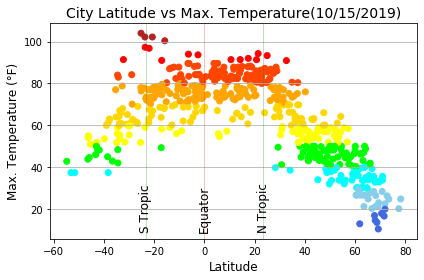

In [28]:
# Create scatter plot to show the Max. Temperature, for the latitude 
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", color=cities_df["Temp Color"])

#Title, X and Y axis labels
plt.grid(b=True, axis="y")
plt.title(f'City Latitude vs Max. Temperature({today_date})', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel(f'Max. Temperature ({Temp_scale})', fontsize=12)

#lines for Tropic or Capricon (South Tropic), Tropic of Cancer (North Tropic) and Equator
plt.axvline(0, linestyle='-', color='red', alpha=0.5, linewidth=0.5)
plt.axvline(-23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)

#Text markers for each of the latitude lines.
xmark = [-23.4,0,23.4]
ymark = cities_df["Max Temp"].min()
xlabel = ["S Tropic","Equator","N Tropic"]

for ind in [0,1,2]:
    plt.text(x = xmark[ind] , y = ymark, s = xlabel[ind], size = 12, horizontalalignment='center', rotation=90, color='black')

# fit layout
plt.tight_layout()

# Save the Figure
plt.savefig("Images/Latitude_vs_Temperature.png")

#### Latitude vs. Humidity Plot

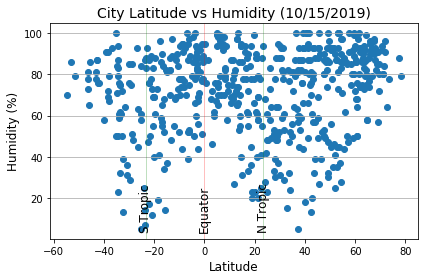

In [32]:
# Create scatter plot to show the Humidity, for the latitude 
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")
#Title, X and Y axis labels
plt.grid(b=True, axis="y")
plt.title(f'City Latitude vs Humidity ({today_date})', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel(f'Humidity (%)', fontsize=12)

#lines for Tropic or Capricon (South Tropic), Tropic of Cancer (North Tropic) and Equator
plt.axvline(0, linestyle='-', color='red', alpha=0.5, linewidth=0.5)
plt.axvline(-23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)

#Text markers for each of the latitude lines.
xmark = [-23.4,0,23.4]
ymark = cities_df["Humidity"].min()
xlabel = ["S Tropic","Equator","N Tropic"]

for ind in [0,1,2]:
    plt.text(x = xmark[ind] , y = ymark, s = xlabel[ind], size = 12, horizontalalignment='center', rotation=90, color='black')

# fit layout
plt.tight_layout()

# Save the Figure
plt.savefig("Images/Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

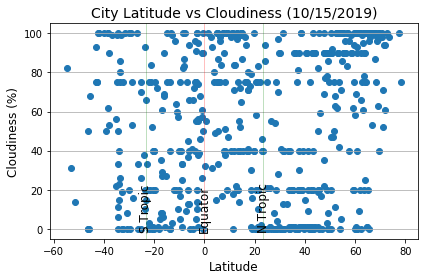

In [33]:
# Create scatter plot to show the Cloudiness, for the latitude 
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")
#Title, X and Y axis labels
plt.grid(b=True, axis="y")
plt.title(f'City Latitude vs Cloudiness ({today_date})', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel(f'Cloudiness (%)', fontsize=12)

#lines for Tropic or Capricon (South Tropic), Tropic of Cancer (North Tropic) and Equator
plt.axvline(0, linestyle='-', color='red', alpha=0.5, linewidth=0.5)
plt.axvline(-23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)

#Text markers for each of the latitude lines.
xmark = [-23.4,0,23.4]
ymark = cities_df["Cloudiness"].min()
xlabel = ["S Tropic","Equator","N Tropic"]

for ind in [0,1,2]:
    plt.text(x = xmark[ind] , y = ymark, s = xlabel[ind], size = 12, horizontalalignment='center', rotation=90, color='black')

# fit layout
plt.tight_layout()

# Save the Figure
plt.savefig("Images/Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

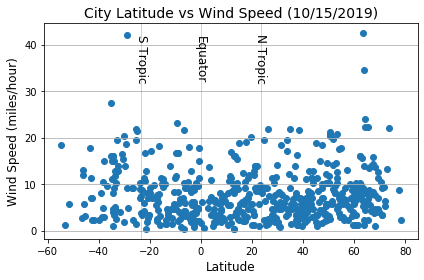

In [34]:
# Create scatter plot to show the Wind Speed, for the latitude 
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")

#Title, X and Y axis labels
plt.grid(b=True, axis="y")
plt.title(f'City Latitude vs Wind Speed ({today_date})', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel(f'Wind Speed ({Speed_scale})', fontsize=12)

#lines for Tropic or Capricon (South Tropic), Tropic of Cancer (North Tropic) and Equator
plt.axvline(0, linestyle='-', color='red', alpha=0.5, linewidth=0.5)
plt.axvline(-23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)
plt.axvline(23.4, linestyle='-', color='green', alpha=0.5, linewidth=0.5)

#Text markers for each of the latitude lines.
xmark = [-23.4,0,23.4]
ymark = cities_df["Wind Speed"].max()-10
xlabel = ["S Tropic","Equator","N Tropic"]

for ind in [0,1,2]:
    plt.text(x = xmark[ind] , y = ymark, s = xlabel[ind], size = 12, horizontalalignment='center', rotation=-90, color='black')

# fit layout
plt.tight_layout()

# Save the Figure
plt.savefig("Images/Latitude_vs_Wind_Speed.png")